Test 1: Graph with Positive Weights


C:\Users\racmi\AppData\Local\Temp\ipykernel_44076\713891966.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(len(matrix)))
C:\Users\racmi\AppData\Local\Temp\ipykernel_44076\713891966.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(len(matrix)))


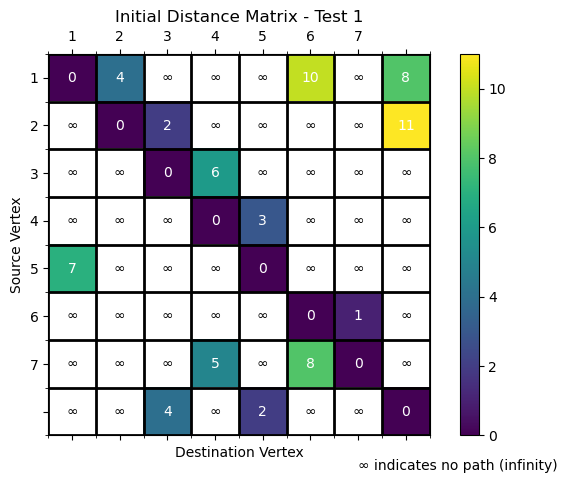

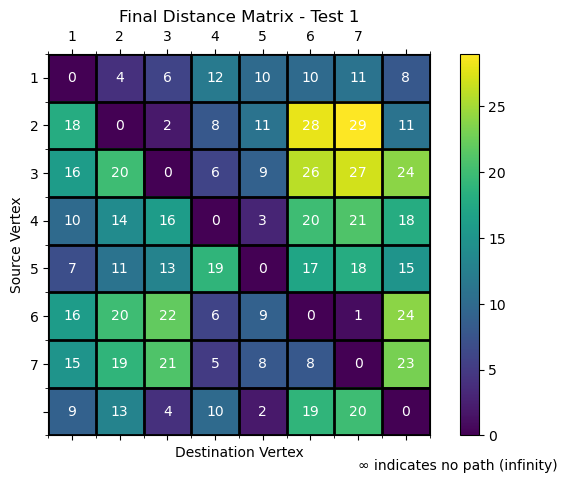

Execution Time: 0.0 seconds
Memory Usage: 4096 bytes
Iterations: 512

Test 2: Graph with Negative Weights


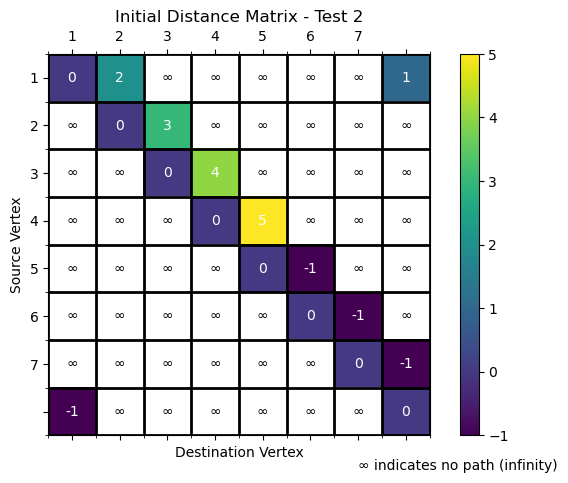

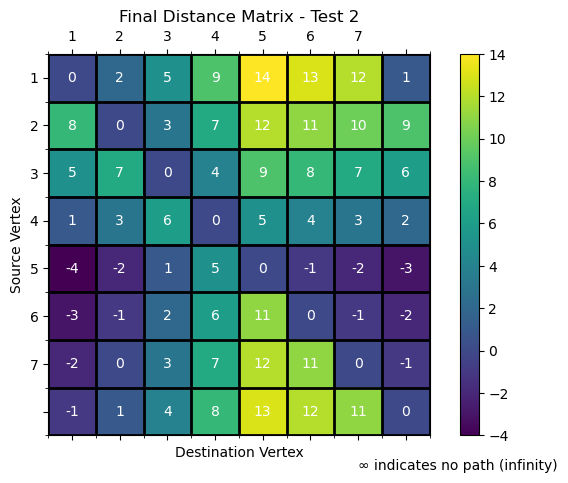

Execution Time: 0.0 seconds
Memory Usage: 0 bytes
Iterations: 512

Test 3: Graph with a Negative Cycle


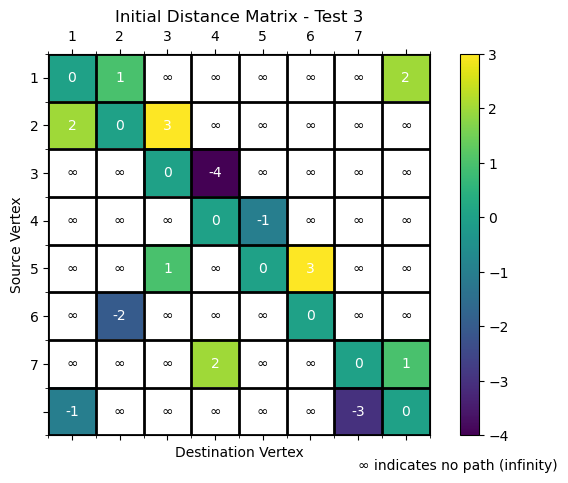

Negative cycle detected. No shortest path matrix available.
Execution Time: 0.0 seconds
Memory Usage: 0 bytes
Iterations: 512


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import psutil
import time

# Constants
NO_PATH = sys.maxsize  # Use sys.maxsize to represent no path in the graph

# Initialize counters for performance measurements
iterations = 0

def floyd_warshall_imperative(graph):
    """
    Applies the Floyd-Warshall algorithm in an iterative way to find the shortest paths
    between all pairs of nodes.

    Args:
        graph (list): The adjacency matrix of the graph.

    Returns:
        tuple: The distance matrix, a boolean indicating if a negative cycle was detected,
               execution time, memory usage, and number of iterations.
    """
    global iterations
    iterations = 0  # Reset iteration count for this run
    n = len(graph)  # Number of vertices in the graph

    # Initialize the distance matrix
    dist = [
        [NO_PATH if graph[i][j] == 0 else graph[i][j] for j in range(n)]
        for i in range(n)
    ]
    for i in range(n):
        dist[i][i] = 0  # Distance from a vertex to itself is 0

    # Measure execution time and memory usage
    start_time = time.time()
    memory_before = psutil.Process().memory_info().rss

    # Main loop of the Floyd-Warshall algorithm
    for k in range(n):
        for i in range(n):
            for j in range(n):
                iterations += 1  # Count iterations (similar to recursive calls)
                # Update distance matrix
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    # Calculate execution time and memory usage
    end_time = time.time()
    memory_after = psutil.Process().memory_info().rss
    execution_time = end_time - start_time
    memory_usage = memory_after - memory_before

    # Check for negative cycles
    for i in range(n):
        if dist[i][i] < 0:
            return dist, True, execution_time, memory_usage, iterations

    return dist, False, execution_time, memory_usage, iterations

def visualize_matrix(matrix, title):
    """
    Visualizes a matrix with enhancements for infinity values and adds a color scale.

    Args:
        matrix (list): The matrix to visualize.
        title (str): The title for the plot.
    """
    # Replace NO_PATH values with infinity for visualization
    matrix = np.array(matrix, dtype=float)
    matrix[matrix == NO_PATH] = np.inf

    # Create the plot
    fig, ax = plt.subplots()
    cax = ax.matshow(matrix, interpolation='nearest', cmap='viridis',
                     extent=[-0.5, matrix.shape[1]-0.5, matrix.shape[0]-0.5, -0.5])
    # Add text labels for each cell
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, '∞' if np.isinf(val) else f'{val:.0f}', ha='center', va='center',
                color='black' if np.isinf(val) else 'white', fontsize=10)

    # Add a color bar and set the title
    fig.colorbar(cax)
    ax.set_title(title)
    plt.xlabel('Destination Vertex')
    plt.ylabel('Source Vertex')
    # Setup ticks and labels
    ax.set_xticks(np.arange(-0.5, len(matrix), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(matrix), 1), minor=True)
    ax.set_xticklabels(range(len(matrix)))
    ax.set_yticklabels(range(len(matrix)))
    # Add note for infinity representation
    plt.figtext(0.99, 0.01, '∞ indicates no path (infinity)', horizontalalignment='right')
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Define and visualize test graphs for the Floyd-Warshall algorithm

    # Test 1: Graph with Positive Weights
    graph_positive = [
        [0, 4, NO_PATH, NO_PATH, NO_PATH, 10, NO_PATH, 8],
        [NO_PATH, 0, 2, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 11],
        [NO_PATH, NO_PATH, 0, 6, NO_PATH, NO_PATH, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, NO_PATH, 0, 3, NO_PATH, NO_PATH, NO_PATH],
        [7, NO_PATH, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, 1, NO_PATH],
        [NO_PATH, NO_PATH, NO_PATH, 5, NO_PATH, 8, 0, NO_PATH],
        [NO_PATH, NO_PATH, 4, NO_PATH, 2, NO_PATH, NO_PATH, 0]
    ]
    print("Test 1: Graph with Positive Weights")
    visualize_matrix(graph_positive, "Initial Distance Matrix - Test 1")
    result, has_negative_cycle, execution_time, memory_usage, iterations = floyd_warshall_imperative(graph_positive)
    if not has_negative_cycle:
        visualize_matrix(result, "Final Distance Matrix - Test 1")
        print(f"Execution Time: {execution_time} seconds")
        print(f"Memory Usage: {memory_usage} bytes")
        print(f"Iterations: {iterations}")

    # Test 2: Graph with Negative Weights (No Negative Cycle)
    graph_negative_weights = [
        [0, 2, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 1],
        [NO_PATH, 0, 3, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, 0, 4, NO_PATH, NO_PATH, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, NO_PATH, 0, 5, NO_PATH, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, -1, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, -1, NO_PATH],
        [NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, -1],
        [-1, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0]
     ]
    print("\nTest 2: Graph with Negative Weights")
    visualize_matrix(graph_negative_weights, "Initial Distance Matrix - Test 2")
    result, has_negative_cycle, execution_time, memory_usage, iterations = floyd_warshall_imperative(graph_negative_weights)
    if not has_negative_cycle:
        visualize_matrix(result, "Final Distance Matrix - Test 2")
        print(f"Execution Time: {execution_time} seconds")
        print(f"Memory Usage: {memory_usage} bytes")
        print(f"Iterations: {iterations}")

    # Test 3: Graph with a Negative Cycle
    graph_negative_cycle = [
        [0, 1, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 2],
        [2, 0, 3, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, 0, -4, NO_PATH, NO_PATH, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, NO_PATH, 0, -1, NO_PATH, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, 1, NO_PATH, 0, 3, NO_PATH, NO_PATH],
        [NO_PATH, -2, NO_PATH, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH],
        [NO_PATH, NO_PATH, NO_PATH, 2, NO_PATH, NO_PATH, 0, 1],
        [-1, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, -3, 0]
    ]
    print("\nTest 3: Graph with a Negative Cycle")
    visualize_matrix(graph_negative_cycle, "Initial Distance Matrix - Test 3")
    result, has_negative_cycle, execution_time, memory_usage, iterations = floyd_warshall_imperative(graph_negative_cycle)
    if has_negative_cycle:
        print("Negative cycle detected. No shortest path matrix available.")
        print(f"Execution Time: {execution_time} seconds")
        print(f"Memory Usage: {memory_usage} bytes")
        print(f"Iterations: {iterations}")
